## Global mean temperature

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

Global temperature and precipitation data
https://catalogue.ceda.ac.uk
Please feel free to use the low resolution data.

In [4]:
filename='CRU_lowres_t.nc' #using Python on my laptop

In [5]:
with xr.open_dataset(filename) as ds:
    print(ds)
    temp=ds.tmp

<xarray.Dataset>
Dimensions:  (time: 1416, lat: 36, lon: 72)
Coordinates:
  * time     (time) datetime64[ns] 1901-01-16 1901-02-15 ... 2018-12-16
  * lon      (lon) float64 -177.5 -172.5 -167.5 -162.5 ... 167.5 172.5 177.5
  * lat      (lat) float64 -87.5 -82.5 -77.5 -72.5 -67.5 ... 72.5 77.5 82.5 87.5
Data variables:
    tmp      (time, lat, lon) float64 ...
    stn      (time, lat, lon) float64 ...
Attributes:
    regrid_method:  bilinear


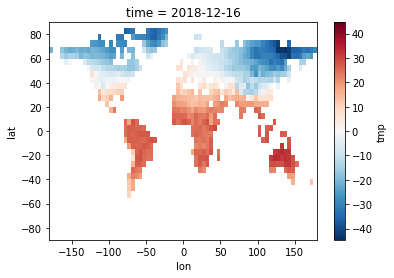

In [6]:
temp.isel(time=-1).plot()

## Creating weights

For a rectangular grid the cosine of the latitude is proportional to the grid cell area.

In [7]:
weights = np.cos(np.deg2rad(temp.lat))
weights.name = "weights"

In [8]:
# Weighted mean
temp_w = temp.weighted(weights)

temp_avg = temp_w.mean(("lon", "lat"))
temp_avg

<xarray.DataArray 'tmp' (time: 1416)>
array([ 4.31383213,  5.89247791,  9.25013995, ..., 14.85259321,
        9.80905382,  6.82117381])
Coordinates:
  * time     (time) datetime64[ns] 1901-01-16 1901-02-15 ... 2018-12-16

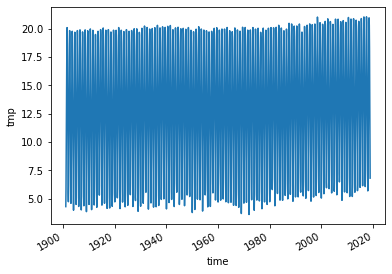

In [9]:
temp_avg.plot()

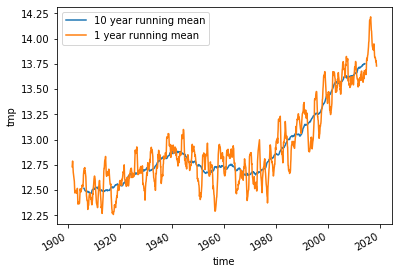

In [10]:
# 10 year running mean
t_roll_avg = temp_avg.rolling(time=120, center=True).mean() # 10 year running mean
t_roll_avg.plot(label='10 year running mean')
t_roll_avg2 = temp_avg.rolling(time=12, center=True).mean() # 10 year running mean
t_roll_avg2.plot(label='1 year running mean')
plt.legend()

### Exercise
Plot 5 year-running mean of temperature

### Exercise
Read precipitation data "cru_ts4.03.1901.2018.pre.dat.nc" and plot 10 year-running average of global of precipitation. You can use the low-resolution data

In [20]:
filename2='CRU_lowres_p.nc' #using Python on my laptop

In [21]:
with xr.open_dataset(filename2) as ds2:
    print(ds2)
    prcp=ds2.pre

<xarray.Dataset>
Dimensions:  (time: 1416, lat: 36, lon: 72)
Coordinates:
  * time     (time) datetime64[ns] 1901-01-16 1901-02-15 ... 2018-12-16
  * lon      (lon) float64 -177.5 -172.5 -167.5 -162.5 ... 167.5 172.5 177.5
  * lat      (lat) float64 -87.5 -82.5 -77.5 -72.5 -67.5 ... 72.5 77.5 82.5 87.5
Data variables:
    pre      (time, lat, lon) float64 ...
    stn      (time, lat, lon) float64 ...
Attributes:
    regrid_method:  bilinear


In [22]:
# Weighted mean
prcp_w = prcp.weighted(weights)

prcp_avg = prcp_w.mean(("lon", "lat"))
prcp_avg

<xarray.DataArray 'pre' (time: 1416)>
array([59.56300486, 61.91162966, 68.66006999, ..., 63.8507248 ,
       62.77549745, 64.18435875])
Coordinates:
  * time     (time) datetime64[ns] 1901-01-16 1901-02-15 ... 2018-12-16

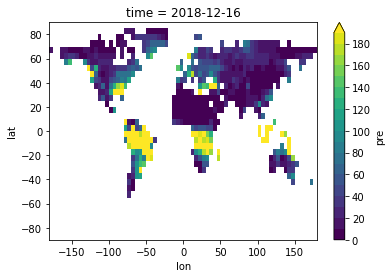

In [23]:
lev1=np.arange(0,200,10)
prcp.isel(time=-1).plot(levels=lev1)

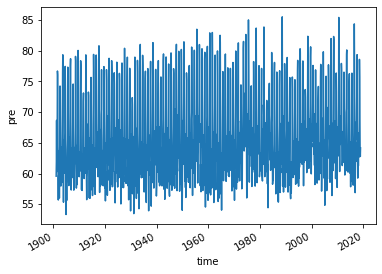

In [24]:
prcp_avg.plot()

### Exercise
Calculate and plot 10 year running mean of global land precipitation.